<a href="https://colab.research.google.com/github/fajarafriad1/Data-Analysis-and-Machine-Learning/blob/main/Credit-Risk-Analysis-and-Prediction/analysis_and_prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/bootcamp xsis/Credit_Analysis_and_Prediction
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/bootcamp xsis/Credit_Analysis_and_Prediction


### Import Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

### Import Datasets

In [ ]:
df_application = pd.read_csv('application_record.csv')
df_credit = pd.read_csv('credit_record.csv')

In [ ]:
df_application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
df_credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


#### Change Column Name to Lowercase

In [ ]:
# Change column names to lowercase
df_credit.columns = df_credit.columns.str.lower()
df_application.columns = df_application.columns.str.lower()

### Data Understanding

In [ ]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   438557 non-null  int64  
 1   code_gender          438557 non-null  object 
 2   flag_own_car         438557 non-null  object 
 3   flag_own_realty      438557 non-null  object 
 4   cnt_children         438557 non-null  int64  
 5   amt_income_total     438557 non-null  float64
 6   name_income_type     438557 non-null  object 
 7   name_education_type  438557 non-null  object 
 8   name_family_status   438557 non-null  object 
 9   name_housing_type    438557 non-null  object 
 10  days_birth           438557 non-null  int64  
 11  days_employed        438557 non-null  int64  
 12  flag_mobil           438557 non-null  int64  
 13  flag_work_phone      438557 non-null  int64  
 14  flag_phone           438557 non-null  int64  
 15  flag_email       

In [ ]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id              1048575 non-null  int64 
 1   months_balance  1048575 non-null  int64 
 2   status          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
df_application.describe(include=object)

,code_gender,flag_own_car,flag_own_realty,name_income_type,name_education_type,name_family_status,name_housing_type,occupation_type
count,438557,438557,438557,438557,438557,438557,438557,304354
unique,2,2,2,5,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,294440,275459,304074,226104,301821,299828,393831,78240


In [ ]:
df_application.describe(include=['int64', 'float64'])

,id,cnt_children,amt_income_total,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,cnt_fam_members
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [ ]:
num_col = list(df_application.select_dtypes(include=['float64', 'int64']).columns)
for c in num_col:
  if df_application[c].nunique() < 20 :
    print(f'unique in col {c}: {df_application[c].unique()}')

unique in col cnt_children: [ 0  1  3  2  4  5 14 19  7  9 12  6]
unique in col flag_mobil: [1]
unique in col flag_work_phone: [1 0]
unique in col flag_phone: [0 1]
unique in col flag_email: [0 1]
unique in col cnt_fam_members: [ 2.  1.  5.  3.  4.  6. 15.  7. 20.  9. 11. 14.  8.]


In [ ]:
obj_col = list(df_application.select_dtypes(include=object).columns)
for c in obj_col:
  print(f'nunique in col {c}: {df_application[c].nunique()}')
  print(f'{df_application[c].unique()}')
  print('------------------------------')

nunique in col code_gender: 2
['M' 'F']
------------------------------
nunique in col flag_own_car: 2
['Y' 'N']
------------------------------
nunique in col flag_own_realty: 2
['Y' 'N']
------------------------------
nunique in col name_income_type: 5
['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
------------------------------
nunique in col name_education_type: 5
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
------------------------------
nunique in col name_family_status: 5
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
------------------------------
nunique in col name_housing_type: 6
['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
------------------------------
nunique in col occupation_type: 18
[nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skil

In [ ]:
df_credit.describe(include='int64')

,id,months_balance
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


In [ ]:
df_credit.describe(include=object)

,status
count,1048575
unique,8
top,C
freq,442031


In [ ]:
# Now you need to slightly correct the data in STATUS.
# Any bank will not lend to a person who is already in debt,
# so let 0 be no debt at all (including debt repayment this month (C) and no credit history (X)).
# Otherwise 1 - this means the presence of any debt at all.
print(df_credit['status'].nunique())
print(df_credit['status'].unique())

8
['X' '0' 'C' '1' '2' '3' '4' '5']


### Data Cleaning

#### Check Duplicates

In [ ]:
dup = df_application[df_application.duplicated]
dup

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members


In [ ]:
# Drop duplicates
df_applicaiton = df_application.drop_duplicates(subset=df_application.columns[1:], keep='first')

#### Check Missing Values

- missing value ada pada kolom occupaation_type

In [ ]:
dfs = [df_application, df_credit]
for d in dfs:
  print('=' * 40)
  for c in d.columns:
    print(f'missing value in {c}: {round(np.mean(d[c].isna()) * 100, 2)} %')

missing value in id: 0.0 %
missing value in code_gender: 0.0 %
missing value in flag_own_car: 0.0 %
missing value in flag_own_realty: 0.0 %
missing value in cnt_children: 0.0 %
missing value in amt_income_total: 0.0 %
missing value in name_income_type: 0.0 %
missing value in name_education_type: 0.0 %
missing value in name_family_status: 0.0 %
missing value in name_housing_type: 0.0 %
missing value in days_birth: 0.0 %
missing value in days_employed: 0.0 %
missing value in flag_mobil: 0.0 %
missing value in flag_work_phone: 0.0 %
missing value in flag_phone: 0.0 %
missing value in flag_email: 0.0 %
missing value in occupation_type: 30.6 %
missing value in cnt_fam_members: 0.0 %
missing value in id: 0.0 %
missing value in months_balance: 0.0 %
missing value in status: 0.0 %


In [ ]:
# membandingkan jumlah row nan
df_application['occupation_type'].value_counts(dropna=False)

NaN                      134203
Laborers                  78240
Core staff                43007
Sales staff               41098
Managers                  35487
Drivers                   26090
High skill tech staff     17289
Accountants               15985
Medicine staff            13520
Cooking staff              8076
Security staff             7993
Cleaning staff             5845
Private service staff      3456
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: occupation_type, dtype: int64

In [ ]:
# membuat binning pada amt_income_total
df_application['amt_income_binned'] = pd.qcut(df_application['amt_income_total'], q=10, duplicates='drop')
df_application['amt_income_binned'].unique()

[(315000.0, 6750000.0], (90000.0, 112500.0], (247500.0, 315000.0], (112500.0, 135000.0], (148500.0, 160780.5], (180000.0, 211500.0], (211500.0, 247500.0], (160780.5, 180000.0], (135000.0, 148500.0], (26099.999, 90000.0]]
Categories (10, interval[float64, right]): [(26099.999, 90000.0] < (90000.0, 112500.0] <
                                            (112500.0, 135000.0] < (135000.0, 148500.0] < ... <
                                            (180000.0, 211500.0] < (211500.0, 247500.0] <
                                            (247500.0, 315000.0] < (315000.0, 6750000.0]]

In [ ]:
df_nan = df_application[df_application['occupation_type'].isna()]

In [ ]:
list_groupby = ['code_gender', 'name_education_type', 'name_income_type', 'amt_income_binned']
# melakukan fillna dengan groupby berdasarkan parameter seperti di list_groupby
# dengan metode most frequent / mode pada kolom occupation_type
# menggunakan if not dikarenakan terdapat hasil nan pada hasil groupby dan mengisi nan tersebut dengan Laborers
df_application['occupation_type'] = df_application.groupby(list_groupby)['occupation_type'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else "Laborers")
# mengecek nan setelah di fillna
df_application[df_application['occupation_type'].isna()]

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,amt_income_binned


In [ ]:
# melihat value counts dari occupation_type yang sudah mengisi nan
df_application.loc[df_nan.index]['occupation_type'].value_counts()

Laborers                 50255
Core staff               29844
Medicine staff           14399
Cooking staff            14330
Managers                 11832
Sales staff               9633
Drivers                   2610
Accountants                614
High skill tech staff      416
Secretaries                247
Security staff              22
Cleaning staff               1
Name: occupation_type, dtype: int64

In [ ]:
df_application.columns

Index(['id', 'code_gender', 'flag_own_car', 'flag_own_realty', 'cnt_children',
       'amt_income_total', 'name_income_type', 'name_education_type',
       'name_family_status', 'name_housing_type', 'days_birth',
       'days_employed', 'flag_mobil', 'flag_work_phone', 'flag_phone',
       'flag_email', 'occupation_type', 'cnt_fam_members',
       'amt_income_binned'],
      dtype='object')

### Feature Engineering

- Membuat Column Age dari days_birth

In [ ]:
df_application['age'] = np.ceil(pd.to_timedelta(df_application['days_birth'], unit = 'D').dt.days / -365)

- unemployed

In [ ]:
df_application['unemployed'] = np.where(df_application['days_employed'] > 0, 'Y', 'N')

- years_employed

In [ ]:
df_application['years_employed'] = round((-df_application['days_employed']/365.25), 1)
df_application.loc[df_application['years_employed']<0, 'years_employed']=0

- own_children

In [ ]:
df_application['own_children'] = np.where(df_application['cnt_children'] > 0, 'Y', 'N')

- total_fam_members

In [ ]:
df_application['total_fam_members'] = df_application['cnt_fam_members'] + df_application['cnt_children']

- Target / Label

In [ ]:
df_credit['target'] = df_credit['status'].copy()
df_credit['target'] = df_credit['target'].replace(['C', 'X'], 0)
df_credit['target'] = df_credit['target'].astype('int64')
df_credit.loc[df_credit['target']>=1,'target']=1

In [ ]:
df_credit = pd.DataFrame(df_credit.groupby('id')['target'].agg(max)).reset_index()

In [ ]:
df_credit['target'].value_counts(normalize=True)

0    0.883658
1    0.116342
Name: target, dtype: float64

#### Merge Dataset

In [ ]:
df = pd.merge(df_application, df_credit, how='inner', on='id')

#### Drop Columns

In [ ]:
# drop columns yang tidak mempengaruhi prediksi, dan sebelum di feature engineering
df = df.drop(['flag_mobil', 'flag_email', 'flag_work_phone', 'flag_phone', 'days_birth', 'amt_income_binned', 'days_employed'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   36457 non-null  int64  
 1   code_gender          36457 non-null  object 
 2   flag_own_car         36457 non-null  object 
 3   flag_own_realty      36457 non-null  object 
 4   cnt_children         36457 non-null  int64  
 5   amt_income_total     36457 non-null  float64
 6   name_income_type     36457 non-null  object 
 7   name_education_type  36457 non-null  object 
 8   name_family_status   36457 non-null  object 
 9   name_housing_type    36457 non-null  object 
 10  occupation_type      36457 non-null  object 
 11  cnt_fam_members      36457 non-null  float64
 12  age                  36457 non-null  float64
 13  unemployed           36457 non-null  object 
 14  years_employed       36457 non-null  float64
 15  own_children         36457 non-null 

In [ ]:
df.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,occupation_type,cnt_fam_members,age,unemployed,years_employed,own_children,total_fam_members,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Managers,2.0,33.0,N,12.4,N,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Managers,2.0,33.0,N,12.4,N,2.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,2.0,59.0,N,3.1,N,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1.0,53.0,N,8.4,N,1.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1.0,53.0,N,8.4,N,1.0,0


#### remove outliers

In [ ]:
binary_obj_col = []
for col in df.select_dtypes(include='object'):
  if df[col].nunique() == 2:
    binary_obj_col.append(col)
obj_col = []
for col in df.select_dtypes(include='object'):
  if df[col].nunique() > 2:
    obj_col.append(col)
num_col = []
for col in df.select_dtypes(include=['int64', 'float64']):
  num_col.append(col)
not_num_col = ['id', 'target']
num_col = [e for e in num_col if e not in not_num_col]
print(binary_obj_col)
print(obj_col)
print(num_col)

['code_gender', 'flag_own_car', 'flag_own_realty', 'unemployed', 'own_children']
['name_income_type', 'name_education_type', 'name_family_status', 'name_housing_type', 'occupation_type']
['cnt_children', 'amt_income_total', 'cnt_fam_members', 'age', 'years_employed', 'total_fam_members']


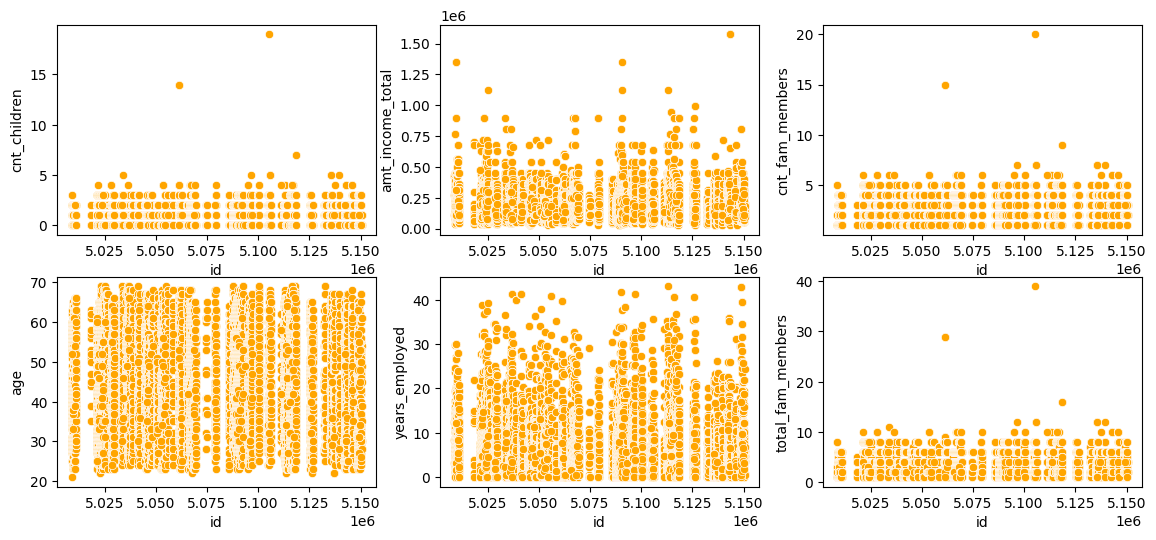

In [ ]:
fig, ax= plt.subplots(nrows= 2, ncols = 3, figsize= (14,6))
ax = ax.flatten()
for n, col in enumerate(num_col):
  sns.scatterplot(data=df, x='id', y=col, ax=ax[n], color= 'orange')

In [ ]:
# menghabpus row yang memiliki anak lebih dari 5
df = df[df['cnt_children'] <= 5]

In [ ]:
df = df.drop(['id'], axis=1)

### Exploratory Data Analysis

In [ ]:
def bad_rate(col):
  df_bad_rate = df.copy()
  if df[col].dtype == object:
    df_bad_rate = df.groupby(col)['target'].agg(['sum', 'count'])
    df_bad_rate['bad_rate'] = round((df_bad_rate['sum']/df_bad_rate['count']) * 100,2)
    df_bad_rate['dist'] = round((df_bad_rate['count']/df_bad_rate['count'].sum()) * 100,2)
    df_bad_rate = df_bad_rate.sort_values(by='bad_rate', ascending=True)

  elif df[col].dtype == np.float64 or df[col].dtype == np.int64:
    df_bad_rate[col+'_bin'] = pd.qcut(df_bad_rate[col], q=5, duplicates='drop')
    df_bad_rate = df_bad_rate.groupby(col+'_bin')['target'].agg(['sum', 'count'])
    df_bad_rate['bad_rate'] = round((df_bad_rate['sum']/df_bad_rate['count']) * 100,2)
    df_bad_rate['dist'] = round((df_bad_rate['count']/df_bad_rate['count'].sum()) * 100,2)
    df_bad_rate.index = df_bad_rate.index.astype('str')

  fig, ax1  = plt.subplots(1,1, figsize=(6,2))
  plt.tick_params(axis='x', rotation = 45)
  # left axis
  ax1 = sns.barplot(data=df_bad_rate, x=df_bad_rate.index, y='dist')
  ax2 = ax1.twinx()
  ax2 = sns.lineplot(data=df_bad_rate, x=df_bad_rate.index, y = 'bad_rate',  marker='o', markerfacecolor='red', color='orange', label='% Bad Rate')
  for x,y in zip(df_bad_rate.index, df_bad_rate['bad_rate']):
    label = "{:.1f}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center')

In [ ]:
def bar_pie_plot(col):

  df_bar = df.groupby([col, 'target'], as_index=False).size()
  df_bar['target_percent'] = df_bar.groupby(col)['size'].transform(lambda x : x / x.sum() * 100)

  value_col = df[col].value_counts().index

  if len(value_col) <= 5:
    rows = int(math.ceil((len(value_col) + 1)/3))
    height = 5
    height = 4 if rows == 1 else height
    fig, ax = plt.subplots(nrows=rows, ncols=3, figsize = (12,rows*height))
    fig.subplots_adjust(hspace=0.9, wspace=0.3)
    ax = ax.flatten() # make ax to one dimensional array
    bar_1 = sns.barplot(data=df_bar, x=col, y='size', hue='target', ax=ax[0])
  else:
    rows = int(math.ceil((len(value_col) + 1)/2))
    fig, ax = plt.subplots(nrows=rows, ncols=2, figsize = (12,rows*4))
    fig.subplots_adjust(hspace=0.5, wspace=0.3)
    ax = ax.flatten() # make ax to one dimensional array
    bar_1 = sns.barplot(data=df_bar, x='size', y=col, hue='target', orient='h', ax=ax[0])

  bar_1.spines[['right', 'top']].set_visible(False)
  bar_1.set_title(f'Jumlah target berdasarkan \n {col}', fontsize=10)
  xlabels = ax[0].get_xticklabels()
  if len(xlabels) > 2:
    bar_1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
  else:
    bar_1.set_xticklabels(xlabels)

  for container in bar_1.containers:
    bar_1.bar_label(container)

  def my_fmt(x):
    total = np.sum(df[df[col]==value_col[i-1]]['target'].value_counts().values)
    return '{:.1f}%\n({:.0f})'.format(x, total*x/100)

  explode = (0, 0.1)
  for i in range(1, len(value_col)+1):
    ax[i].pie(df[df[col]==value_col[i-1]]['target'].value_counts().values, labels=df[df[col]==value_col[i-1]]['target'].value_counts().index,
              autopct=my_fmt, pctdistance=0.75, wedgeprops=dict(width=.5, linewidth=3, edgecolor='white'), explode=explode,
              textprops={'fontsize': 8})
    total = np.sum(df[df[col]==value_col[i-1]]['target'].value_counts().values)
    ax[i].set_title(f'Persentase target pada \n {col} : {value_col[i-1]}', fontsize=10)
    ax[i].text(0., 0., str(total), horizontalalignment='center', verticalalignment='center')
    ax[i].legend(title='target', loc='upper right')


#### code_gender
- nasabah wanita (24430 nasabah) lebih banyak dibanding dengan nasabah pria (12027 nasabah)
- kegagalan credit pada nasabah wanita sebesar 12.7 %
- kegagalan credit pada nasbah pria sebesar 11.3 %

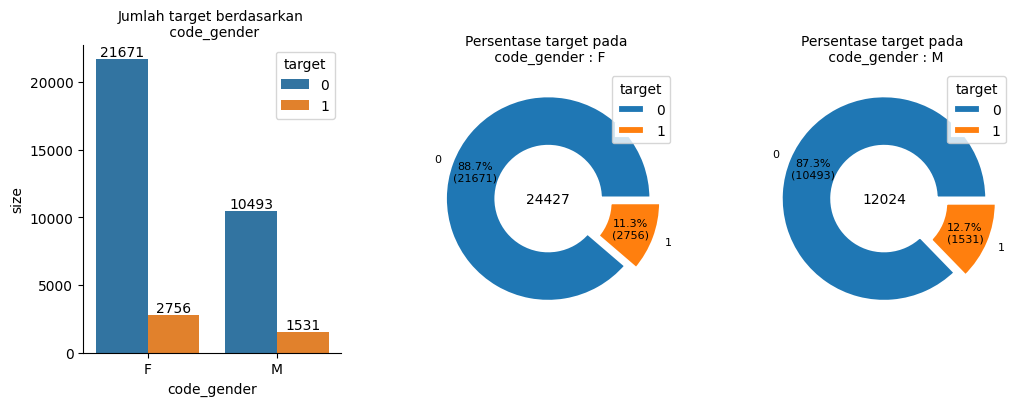

In [ ]:
bar_pie_plot('code_gender')

#### flag_own_car
- nasabah yang tidak memiliki mobil (22614 nasabah) lebih banyak ketimbang yang memiliki mobil (13843 nasabah)
- kegagalan kredit pada nasabah yang tidak memiliki mobil sebesar 12 %
- kegagalan kredit pada nasabah yang memiliki mobil sebesar 11.3 %

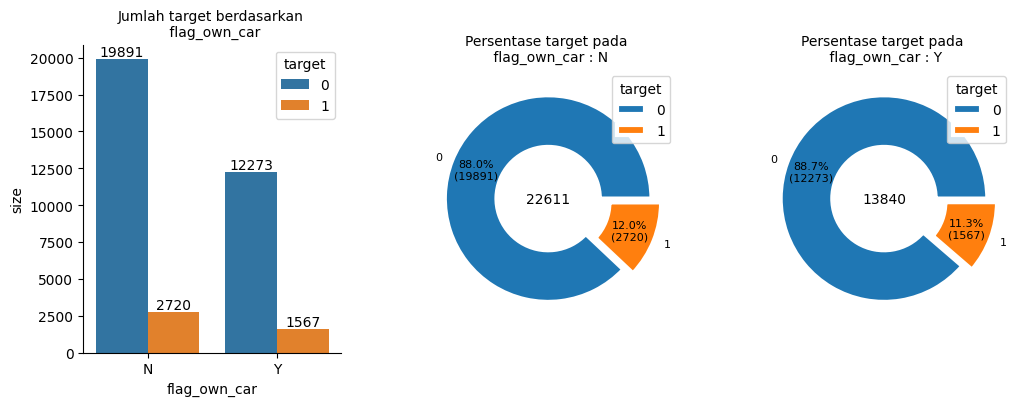

In [ ]:
bar_pie_plot('flag_own_car')

#### flag_own_realty
- nasabah yang tidak memiliki property (24506 nasabah) lebih banyak ketimbang yang memiliki properti (11951 nasabah)
- kegagalan kredit pada nasabah yang tidak memiliki mobil sebesar 12 %
- kegagalan kredit pada nasabah yang memiliki mobil sebesar 11.3 %

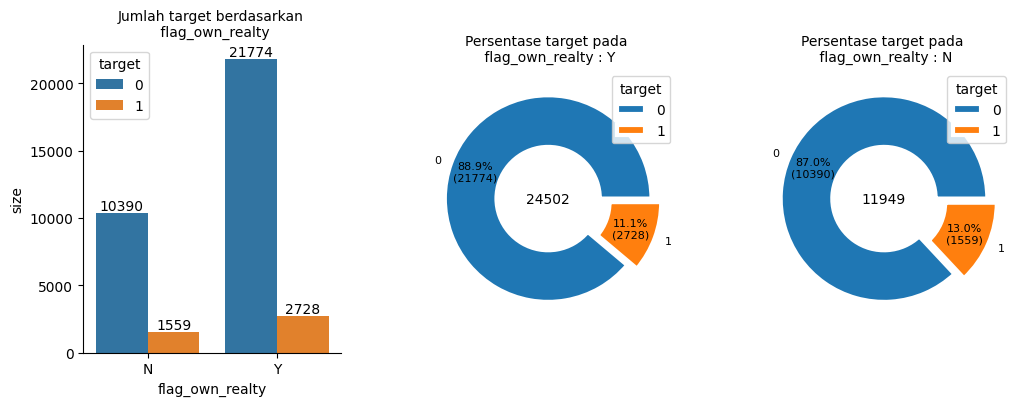

In [ ]:
bar_pie_plot('flag_own_realty')

#### unemployed
- nasabah kredit terbayak terdapat pada nasabah yang berstatus memilki pekerjaan (30322)
- nasabah dengan persentase kegagalan kredit terbesar terdapat pada nasabah yang berstatus memiliki pekerjaan (12.1 %)
- nasabah yang tidak memiliki pekerjaan memiliki persentase kegagalan kredit (10.2 %)

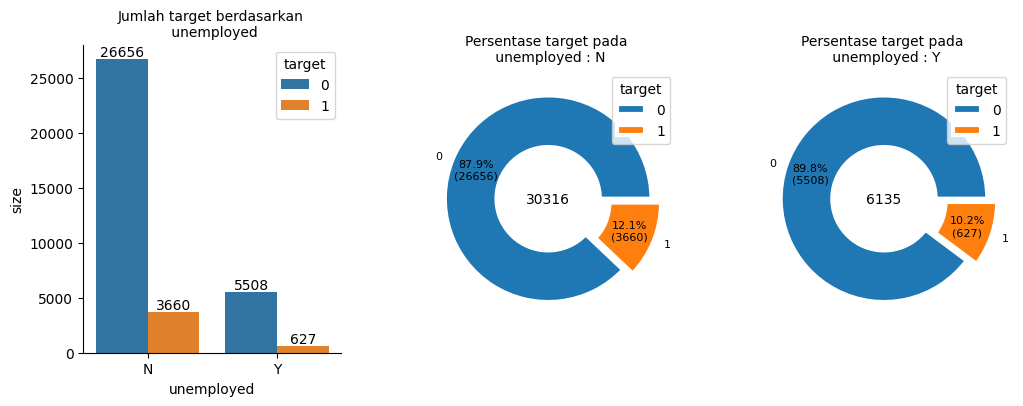

In [ ]:
bar_pie_plot('unemployed')

#### own_children
- nasabah kredit terbanyak terdapat pada nasabah yang tidak memiliki anak (25201 nasabah)
- nasabah dengan persentase kegagalan kredit terbesar terdapat pada nasabah yang memiliki anak (12.0 %)
- nasabah yang tidak memiliki anak memiliki persentase kegagalan kreditnya (11.7 %)

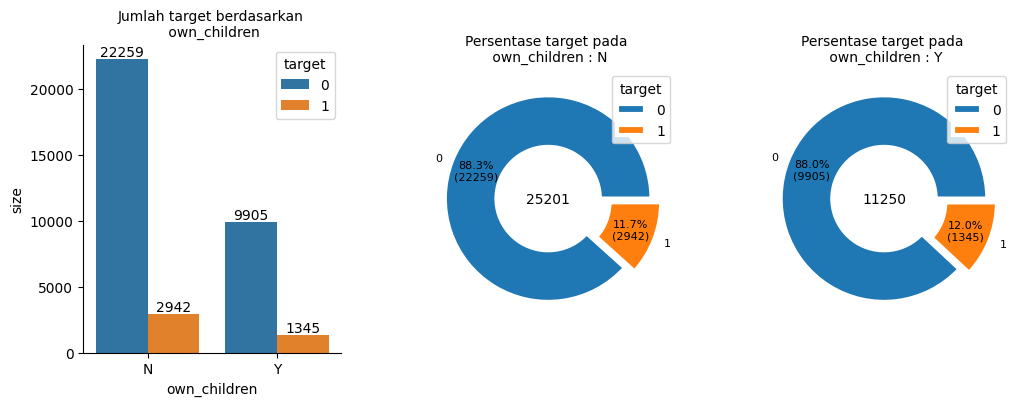

In [ ]:
bar_pie_plot('own_children')

#### name_education_type
- nasabah dengan tingkat pendidikan secondary / secondary special (24777 nasabah) menjadi pengguna kredit terbanyak disusul dengan higher education (9864 nasabah)
- kegagalan kredit tertinggi terdapat pada tingkat pendidikan academic degree sebesar 21.9 % dan incomplete higher dengan 14.7 %
- kegagalan kredit terendah terdapat pada tingkat pendidikan lower secondary dengan 10.4 %

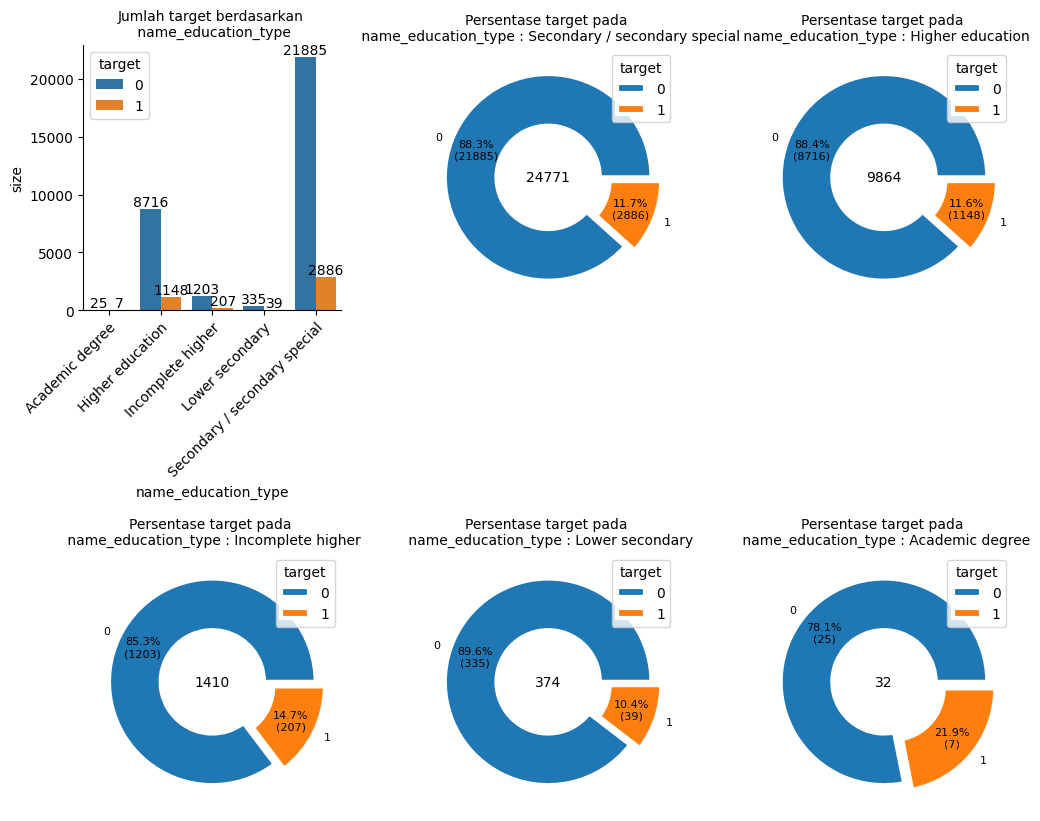

In [ ]:
bar_pie_plot('name_education_type')

#### name_income_type
- nasabah dengan pengguna kredit terbanyak terdapat pada nasabah yang berpenghasilan dari bekerja (18819 nasabah), paling sedikit pada nasabah yang berpenghasilan sebagai pelajar (11 nasabah)
- kegagalan kredit dengan persentase terbesar terdapat pada nasabah yang berpenghasilan sebagai pelayan publik
- kegagalan kredit dengan persentase terkecil terdapat pada nasabah yang berpenghasilan sebagai pelajar

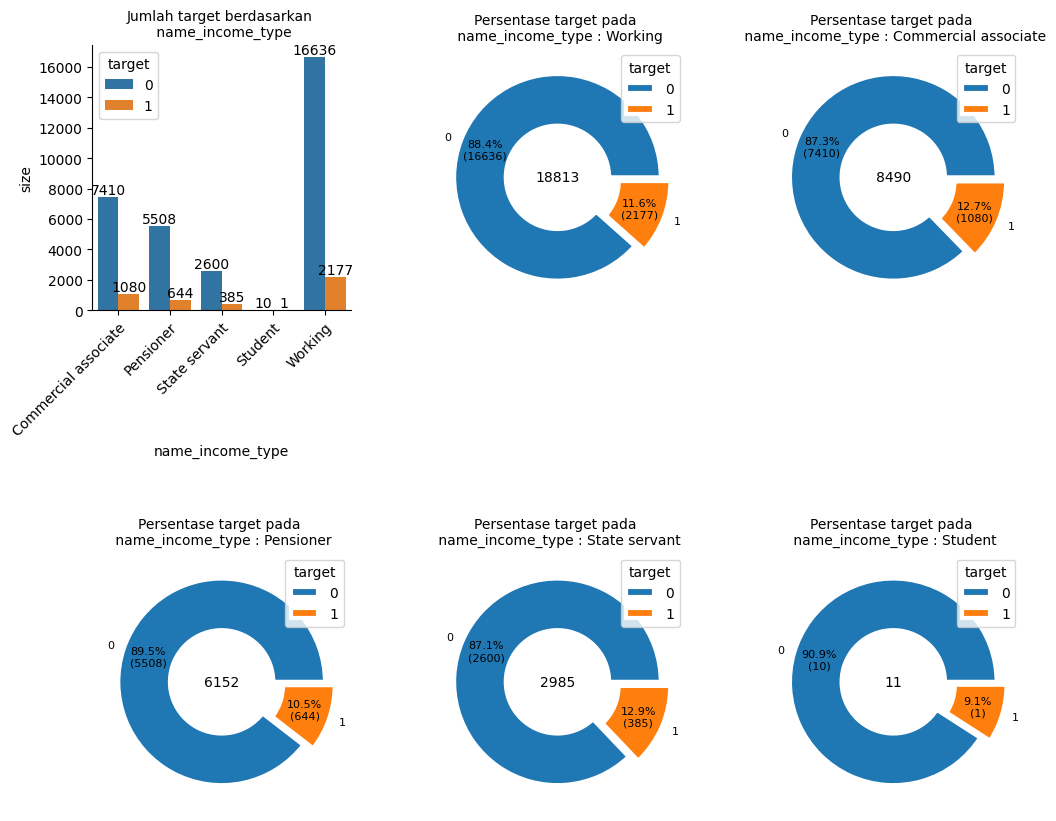

In [ ]:
bar_pie_plot('name_income_type')

#### name_family_status
- nasabah kredit terbanyak terdapat pada nasabah yang berstatus married (25048 nasabah), paling sedikit pada nasabah yang berstatus janda (1532 nasabah)
- kegagalan kredit dengan persentase tertinggi terdapat pada nasabah yang berstatus single (12.9 %)
- kegagalan kredit dengan persentase terendah terdapat pada nasabah yang berstatus janda (10.6 %)

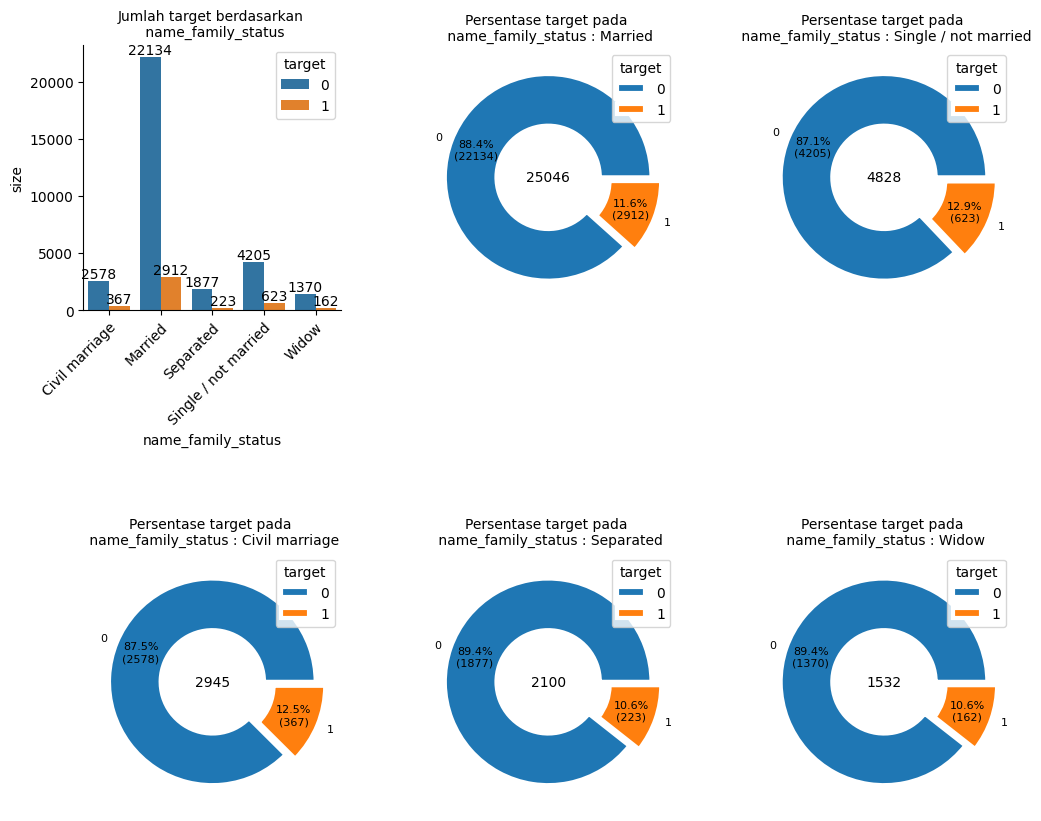

In [ ]:
bar_pie_plot('name_family_status')

#### name_housing_type
- nasabah kredit terbanyak terdapat pada nasabah yang bertempat tinggal di house/apartment (132548 nasabah), paling sedikit di office apartment (262 nasabah)
- persentase kegagalan kredit terbesar terdapat pada nasabah yang bertempat tinggal di office apartment (14.5 %)
- persentase kegagalan kredit terkecil terdapat pada nasabah yang bertempat tinggal di co-op apartment (8.3 %)


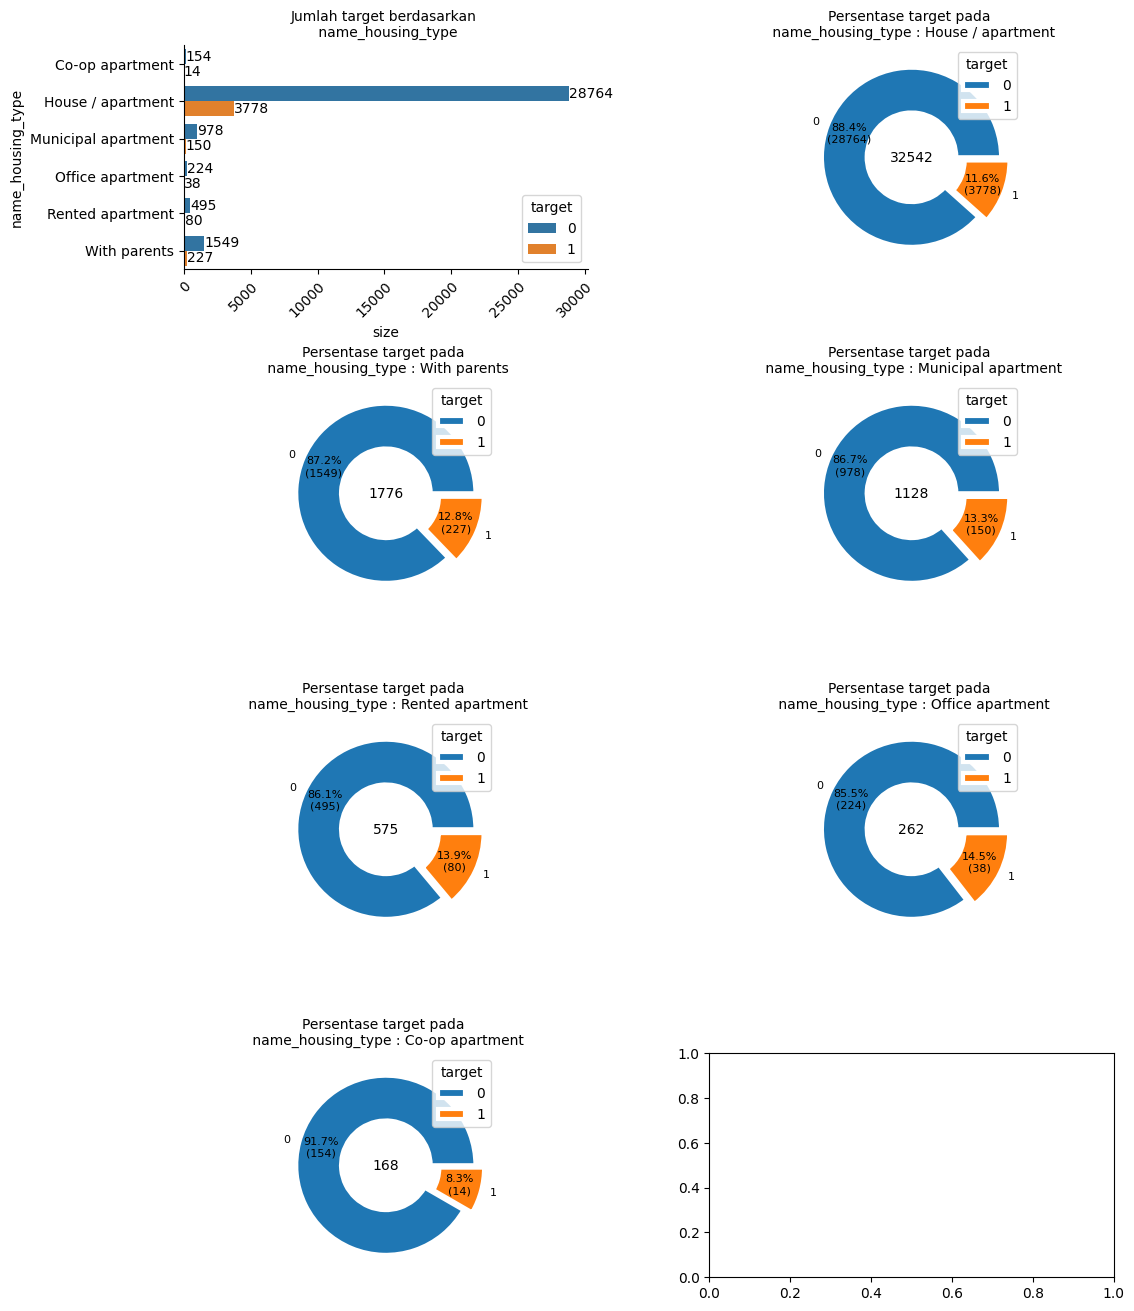

In [ ]:
bar_pie_plot('name_housing_type')

#### occupation_type
- nasabah kredit terbanyak terdapat pada nasabah yang bekerja sebagai buruh (10424 nasabah) dan paling sedikit it staff (60 nasabah)
- nasabah dengan persentase kegagalan kredit terbesar bekerja sebagai it staf (18.3 %)
- nasabah dengan persentase kegagalan kredit terkecil bekerja sebagai private seervice staff (6.4 %)

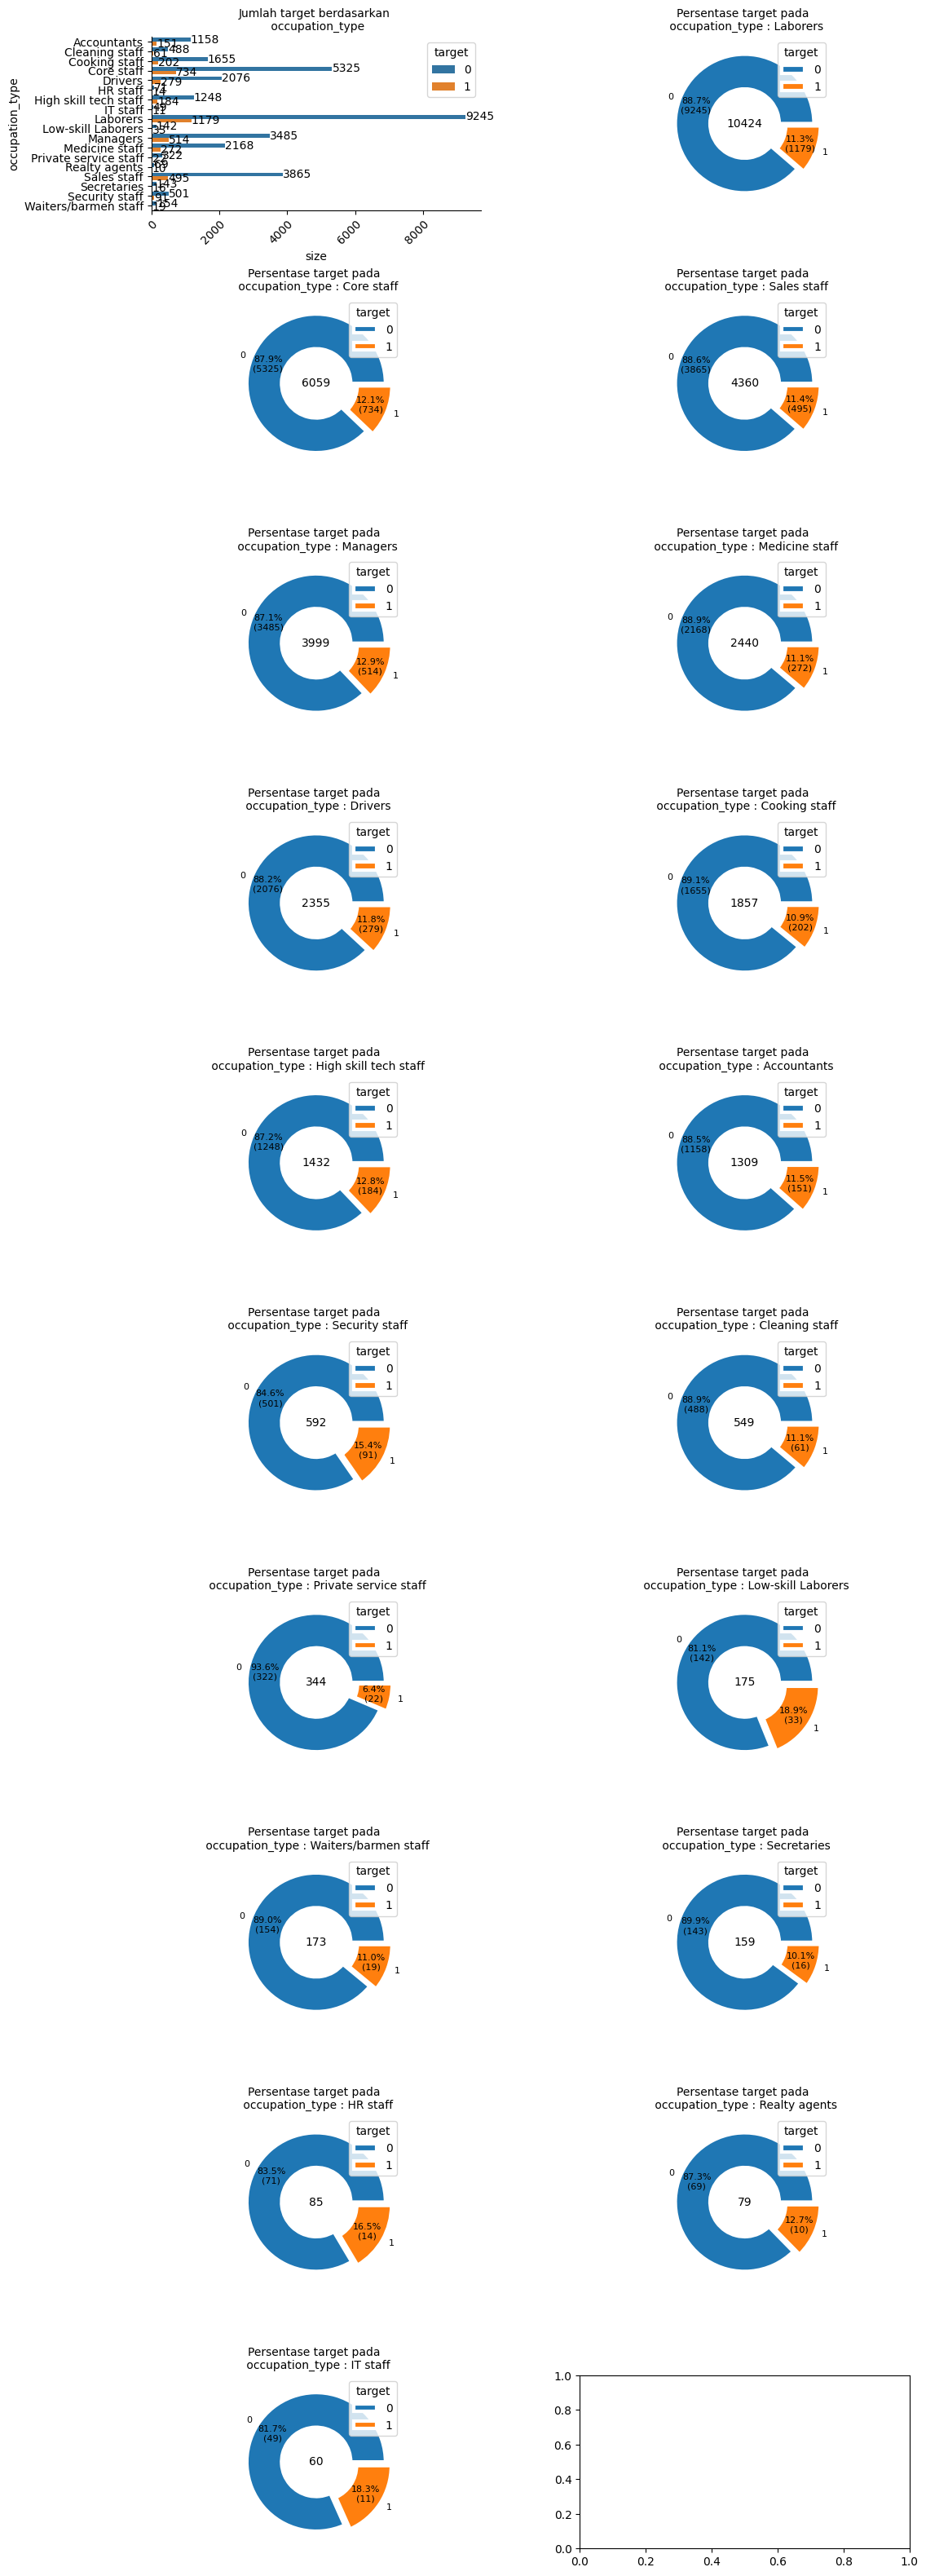

In [ ]:
bar_pie_plot('occupation_type')

#### cnt_children dan cnt_fam_members
- nasabah yang gagal kredit cenderung memiliki penghasilan lebih kecil dan total family members yang sidikit

<Axes: xlabel='amt_income_total', ylabel='total_fam_members'>

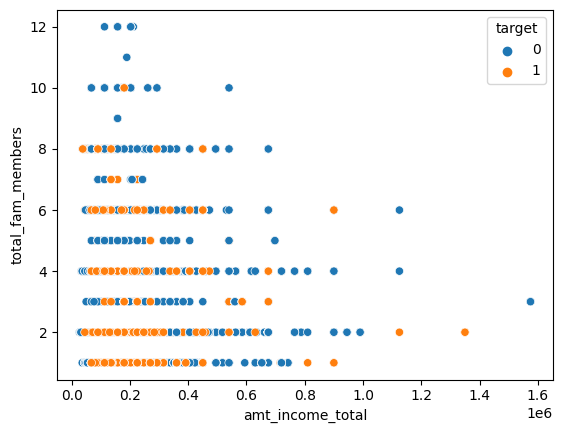

In [ ]:
sns.scatterplot(data=df, x="amt_income_total", y="total_fam_members", hue='target')

#### age
- nasabah kredit kebanyakan berumur 31 - 46 tahun

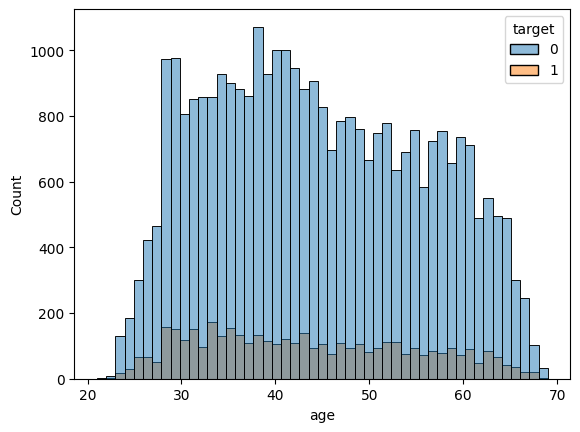

In [ ]:
hist_1 = sns.histplot(data=df, x='age', hue='target', bins=len(df['age'].unique())
                      #shrink=.8
                      #multiple='dodge'
                      )

#### years_employed
- nasabah kredit kebanyakan sudah bekerja 1 - 16 tahun

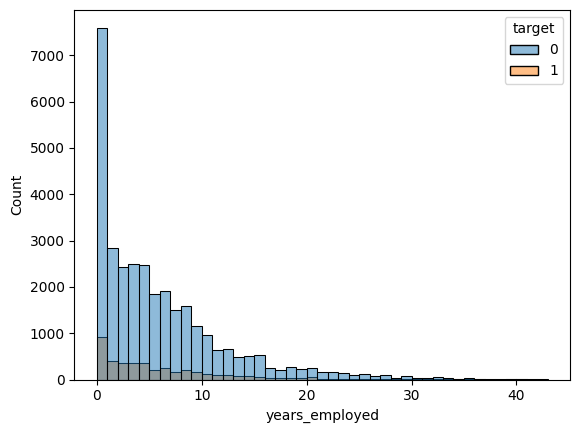

In [ ]:
hist_2 = sns.histplot(data=df, x='years_employed', hue='target', bins=int(df['years_employed'].max() - df['years_employed'].min())
                      #shrink=.8
                      #multiple='dodge'
                      )

#### amt_income_total

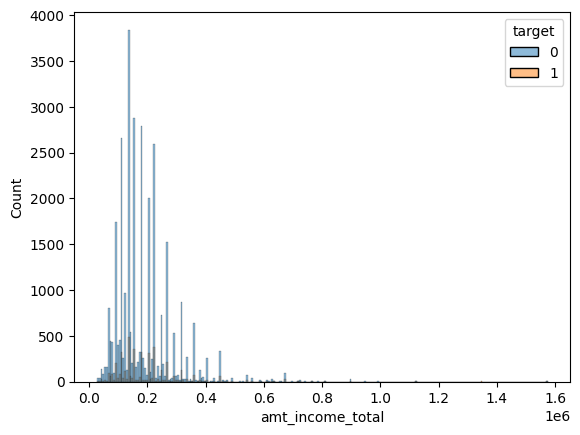

In [ ]:
hist_3 = sns.histplot(data=df, x='amt_income_total', hue='target'
                      #shrink=.8
                      #multiple='dodge'
                      )

In [ ]:
binary_obj_col = []
for col in df.select_dtypes(include='object'):
  if df[col].nunique() == 2:
    binary_obj_col.append(col)

obj_col = []
for col in df.select_dtypes(include='object'):
  if df[col].nunique() > 2:
    obj_col.append(col)

num_col = []
for col in df.select_dtypes(include=['int64', 'float64']):
  num_col.append(col)
num_col.remove('target')
print(num_col)

['cnt_children', 'amt_income_total', 'cnt_fam_members', 'age', 'years_employed', 'total_fam_members']


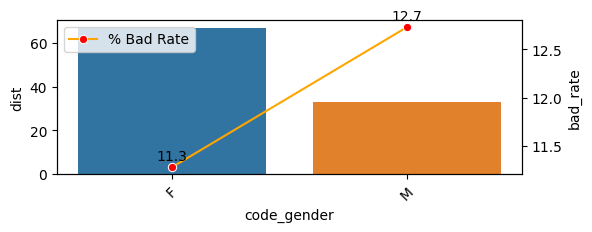

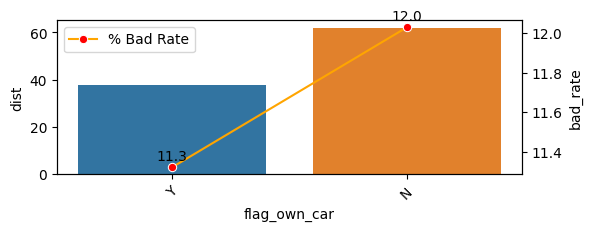

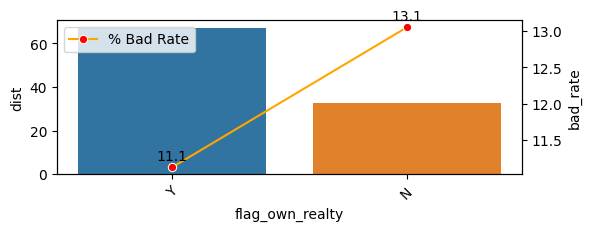

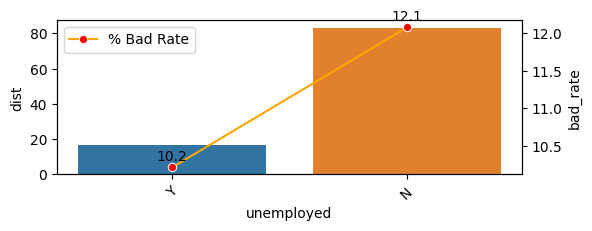

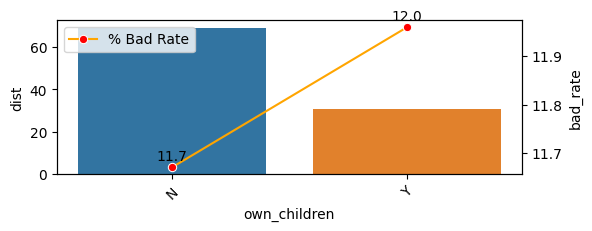

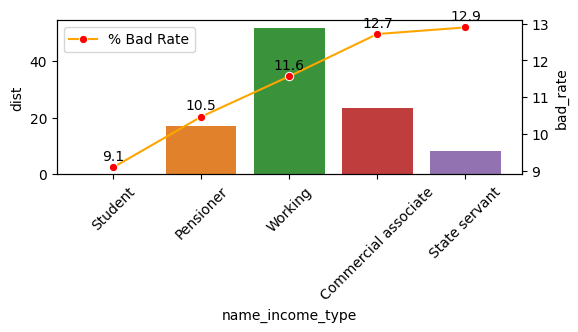

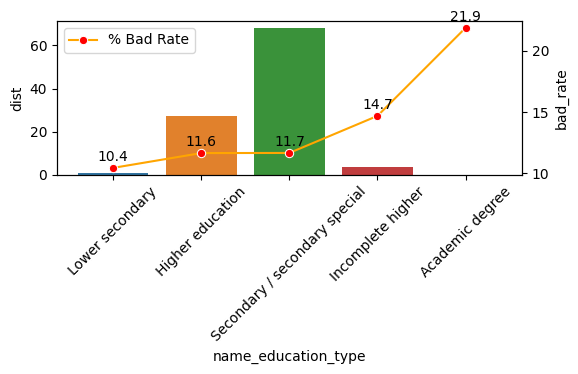

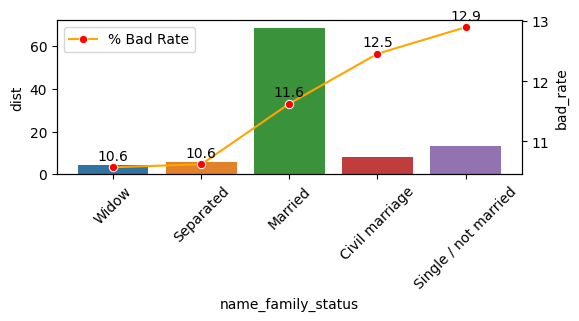

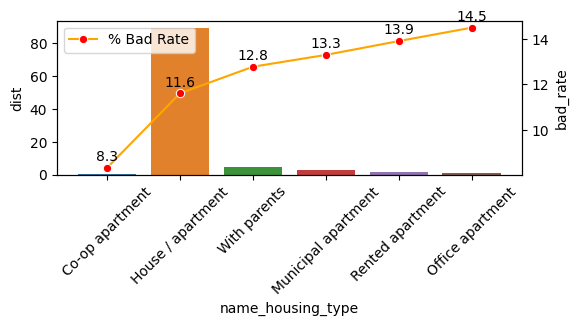

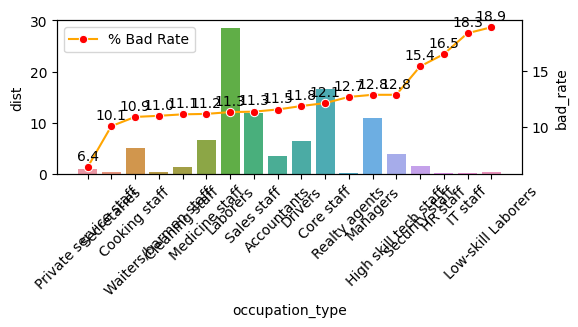

In [ ]:
for col in binary_obj_col + obj_col:
  bad_rate(col)

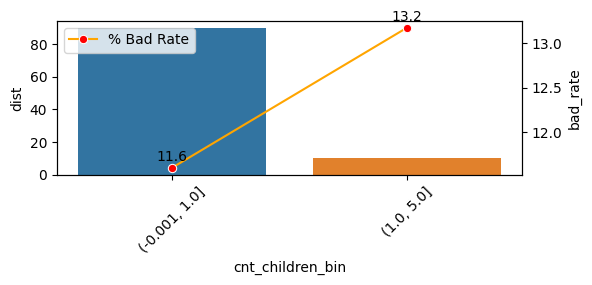

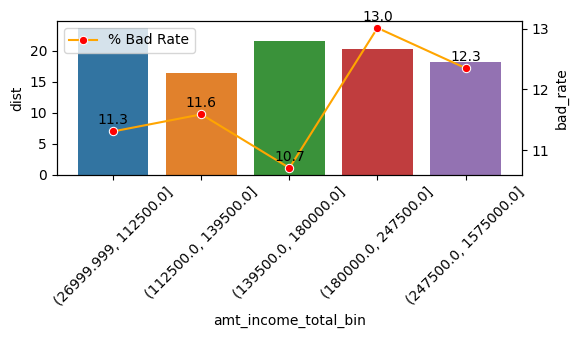

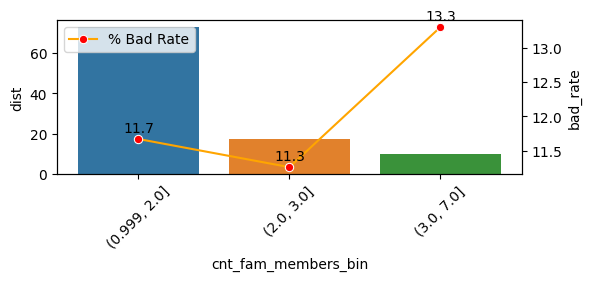

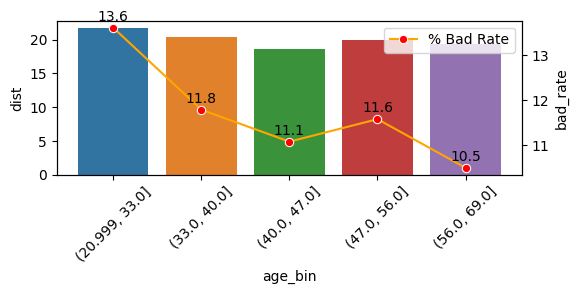

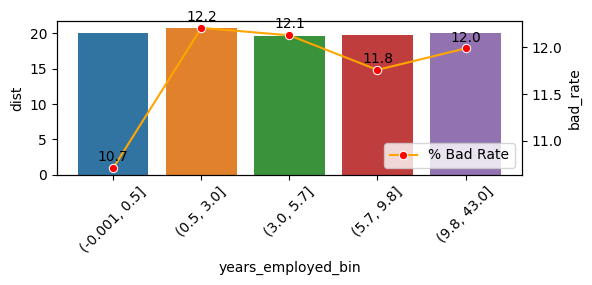

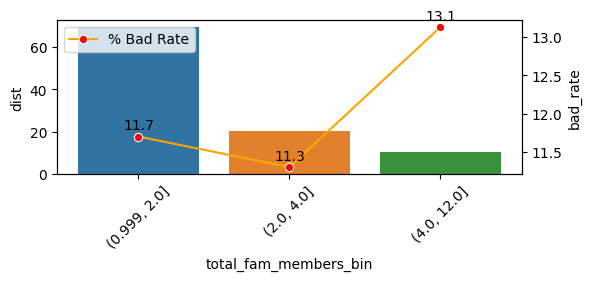

In [ ]:
for col in num_col:
  bad_rate(col)

#### Correlation

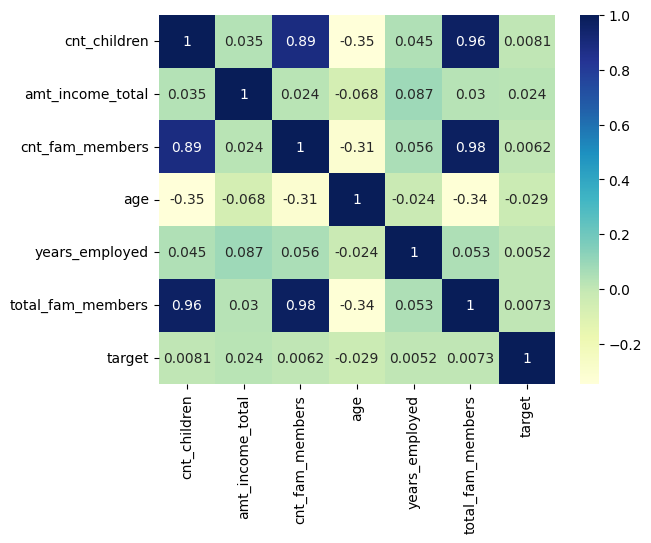

In [ ]:
corr_plot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

### Data Preprocessing

#### name_education_type

In [ ]:
df['name_education_type'].value_counts()

Secondary / secondary special    24771
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: name_education_type, dtype: int64

In [ ]:
df['name_education_type'] = df['name_education_type'].replace('Lower secondary', 1)
df['name_education_type'] = df['name_education_type'].replace('Secondary / secondary special', 2)
df['name_education_type'] = df['name_education_type'].replace('Incomplete higher', 3)
df['name_education_type'] = df['name_education_type'].replace('Higher education', 4)
df['name_education_type'] = df['name_education_type'].replace('Academic degree', 5)

#### name_income_type

In [ ]:
df['name_income_type'] = df['name_income_type'].replace('Student', 1)
df['name_income_type'] = df['name_income_type'].replace('Pensioner', 2)
df['name_income_type'] = df['name_income_type'].replace('Working', 3)
df['name_income_type'] = df['name_income_type'].replace('State servant', 4)
df['name_income_type'] = df['name_income_type'].replace('Commercial associate', 5)

In [ ]:
df.columns

Index(['code_gender', 'flag_own_car', 'flag_own_realty', 'cnt_children',
       'amt_income_total', 'name_income_type', 'name_education_type',
       'name_family_status', 'name_housing_type', 'occupation_type',
       'cnt_fam_members', 'age', 'unemployed', 'years_employed',
       'own_children', 'total_fam_members', 'target'],
      dtype='object')

#### Label Encoding Binary Columns

In [ ]:
for col in binary_obj_col:
  print(f'kolom {col}')
  df[col] = df[col].replace(['Y', 'F'], 1)
  df[col] = df[col].replace(['N', 'M'], 0)
  print(df[col].value_counts())

kolom code_gender
1    24427
0    12024
Name: code_gender, dtype: int64
kolom flag_own_car
0    22611
1    13840
Name: flag_own_car, dtype: int64
kolom flag_own_realty
1    24502
0    11949
Name: flag_own_realty, dtype: int64
kolom unemployed
0    30316
1     6135
Name: unemployed, dtype: int64
kolom own_children
0    25201
1    11250
Name: own_children, dtype: int64


#### target

In [ ]:
df['target'] = np.where(df['target'] == 1, 'yes', 'no')
df['target'].value_counts()

no     32164
yes     4287
Name: target, dtype: int64

In [ ]:
df.columns

Index(['code_gender', 'flag_own_car', 'flag_own_realty', 'cnt_children',
       'amt_income_total', 'name_income_type', 'name_education_type',
       'name_family_status', 'name_housing_type', 'occupation_type',
       'cnt_fam_members', 'age', 'unemployed', 'years_employed',
       'own_children', 'total_fam_members', 'target'],
      dtype='object')

#### One-hot encoder

In [ ]:
col_one_hot = ['name_family_status', 'name_housing_type', 'occupation_type']
for kolom in col_one_hot:
    dummies = pd.get_dummies(df[kolom], drop_first=True)
    df = df.drop([kolom], axis = 1)
    df = pd.concat([df,dummies], axis = 1)

In [ ]:
df

,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,cnt_fam_members,age,unemployed,years_employed,own_children,total_fam_members,target,Married,Separated,Single / not married,Widow,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
0,0,1,1,0,427500.0,3,4,2.0,33.0,0,12.4,0,2.0,yes,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,1,1,0,427500.0,3,4,2.0,33.0,0,12.4,0,2.0,yes,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,1,0,112500.0,3,2,2.0,59.0,0,3.1,0,2.0,no,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,1,0,270000.0,5,2,1.0,53.0,0,8.4,0,1.0,no,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,1,0,270000.0,5,2,1.0,53.0,0,8.4,0,1.0,no,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,0,1,1,0,315000.0,3,2,2.0,48.0,0,6.6,0,2.0,yes,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
36453,1,0,1,0,157500.0,5,4,2.0,34.0,0,3.6,0,2.0,yes,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
36454,1,0,1,0,157500.0,2,4,2.0,34.0,0,3.6,0,2.0,yes,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
36455,1,0,1,0,283500.0,3,2,2.0,50.0,0,1.8,0,2.0,yes,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#### drop columns total_fam_members

In [ ]:
df = df.drop(['total_fam_members'], axis=1)

#### Data Splitting

In [ ]:
df.columns

Index(['code_gender', 'flag_own_car', 'flag_own_realty', 'cnt_children',
       'amt_income_total', 'name_income_type', 'name_education_type',
       'cnt_fam_members', 'age', 'unemployed', 'years_employed',
       'own_children', 'target', 'Married', 'Separated',
       'Single / not married', 'Widow', 'House / apartment',
       'Municipal apartment', 'Office apartment', 'Rented apartment',
       'With parents', 'Cleaning staff', 'Cooking staff', 'Core staff',
       'Drivers', 'HR staff', 'High skill tech staff', 'IT staff', 'Laborers',
       'Low-skill Laborers', 'Managers', 'Medicine staff',
       'Private service staff', 'Realty agents', 'Sales staff', 'Secretaries',
       'Security staff', 'Waiters/barmen staff'],
      dtype='object')

In [ ]:
X = df.drop('target', axis=1) # X value contains all the variables except labels
y = df['target'] # these are the labels

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,0.0,1.0,1.0,0.0,0.258721,0.50,0.75,0.166667,0.250000,0.0,0.288372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.258721,0.50,0.75,0.166667,0.250000,0.0,0.288372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.055233,0.50,0.25,0.166667,0.791667,0.0,0.072093,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.156977,1.00,0.25,0.000000,0.666667,0.0,0.195349,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.156977,1.00,0.25,0.000000,0.666667,0.0,0.195349,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36446,0.0,1.0,1.0,0.0,0.186047,0.50,0.25,0.166667,0.562500,0.0,0.153488,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36447,1.0,0.0,1.0,0.0,0.084302,1.00,0.75,0.166667,0.270833,0.0,0.083721,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
36448,1.0,0.0,1.0,0.0,0.084302,0.25,0.75,0.166667,0.270833,0.0,0.083721,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
36449,1.0,0.0,1.0,0.0,0.165698,0.50,0.25,0.166667,0.604167,0.0,0.041860,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

### Data Modelling

#### functions

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=20)

def cross_val(X, y, model, skf, is_xgb=False, threshold=0.5):
    cv = {'tn':[], 'fp':[], 'fn':[], 'tp':[],
        'prec_yes':[], 'recall_yes':[], 'prec_no':[], 'recall_no':[],
        'accuracy':[], 'f1_score':[]}
    for train, val in skf.split(X, y):
        X_cv_train, X_cv_val = X[train], X[val]
        y_cv_train, y_cv_val = y.iloc[train], y.iloc[val]
        model.fit(X_cv_train, y_cv_train)
        if is_xgb:
            y_cv_pred = np.where(model.predict_proba(X_cv_val)[:,1] >= threshold, 1, 0)
        else:
            y_cv_pred = np.where(model.predict_proba(X_cv_val)[:,1] >= threshold, 'yes', 'no')
        cm_ravel = confusion_matrix(y_cv_val, y_cv_pred).ravel()
        for i, cm_i in enumerate(['tn', 'fp', 'fn', 'tp']):
            cv[cm_i].append(cm_ravel[i])
        cr = classification_report(y_cv_val, y_cv_pred, output_dict=True)
        if is_xgb:
            label = ['1', '0']
        else:
            label = ['yes','no']
        cv['prec_yes'].append(cr[label[0]]['precision'])
        cv['recall_yes'].append(cr[label[0]]['recall'])
        cv['prec_no'].append(cr[label[1]]['precision'])
        cv['recall_no'].append(cr[label[1]]['recall'])
        cv['accuracy'].append(cr['accuracy'])
        cv['f1_score'].append(cr[label[0]]['f1-score'])
    df_cv = pd.DataFrame(cv)
    df_mean = pd.DataFrame([['']*4 + list(df_cv.mean().values[4:])], columns=df_cv.columns, index=['mean'])
    df_std_dev = pd.DataFrame([['']*4 + list(df_cv.std().values[4:])], columns=df_cv.columns, index=['std.dev'])
    return pd.concat([df_cv, df_mean, df_std_dev])

In [ ]:
def check_model(model, threshold=0.5, is_xgb = False):
    if is_xgb :
        model.fit(X_train, y_train.replace({'yes':1,'no':0}))
        label = np.array(['no', 'yes'], dtype='object')
    else:
        model.fit(X_train, y_train)
        label = model.classes_
    y_pred = np.where(model.predict_proba(X_test)[:,1]>=threshold, 'yes', 'no')
    fig = px.imshow(pd.DataFrame(confusion_matrix(y_test, y_pred),
            columns='Predicted '+label, index = 'actual '+ label),
            text_auto=True, width=500, aspect='auto', color_continuous_scale=px.colors.sequential.Emrld)
    fig.show()
    print(classification_report(y_test, y_pred))

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=200)

In [ ]:
cross_val(X_train, y_train, log_reg, skf, threshold=0.2)

,tn,fp,fn,tp,prec_yes,recall_yes,prec_no,recall_no,accuracy,f1_score
0,5617,13,745,4,0.235294,0.005340,0.882898,0.997691,0.881173,0.010444
1,5603,27,743,6,0.181818,0.008011,0.882918,0.995204,0.879291,0.015345
2,5606,23,749,1,0.041667,0.001333,0.882140,0.995914,0.878978,0.002584
3,5624,5,747,2,0.285714,0.002670,0.882750,0.999112,0.882095,0.005291
mean,,,,,0.186123,0.004339,0.882677,0.996980,0.880384,0.008416
std.dev,,,,,0.105234,0.002961,0.000366,0.001764,0.001497,0.005654


In [ ]:
import plotly.express as px
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
check_model(log_reg, threshold=0.2)

              precision    recall  f1-score   support

          no       0.88      1.00      0.94      9646
         yes       0.42      0.01      0.02      1290

    accuracy                           0.88     10936
   macro avg       0.65      0.50      0.48     10936
weighted avg       0.83      0.88      0.83     10936



#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=6, min_samples_leaf=200, random_state=20)

In [ ]:
cross_val(X_train, y_train, decision_tree, skf, threshold=0.2)

,tn,fp,fn,tp,prec_yes,recall_yes,prec_no,recall_no,accuracy,f1_score
0,5187,443,652,97,0.179630,0.129506,0.888337,0.921314,0.828343,0.150504
1,5395,235,700,49,0.172535,0.065421,0.885152,0.958259,0.853425,0.094869
2,5328,301,688,62,0.170799,0.082667,0.885638,0.946527,0.844960,0.111411
3,5435,194,716,33,0.145374,0.044059,0.883596,0.965536,0.857322,0.067623
mean,,,,,0.167085,0.080413,0.885681,0.947909,0.846013,0.106102
std.dev,,,,,0.014969,0.036339,0.001973,0.019382,0.012860,0.034673


In [ ]:
check_model(decision_tree, threshold=0.2)

              precision    recall  f1-score   support

          no       0.89      0.92      0.90      9646
         yes       0.17      0.13      0.14      1290

    accuracy                           0.82     10936
   macro avg       0.53      0.52      0.52     10936
weighted avg       0.80      0.82      0.81     10936



In [ ]:
# df['code_gender'] = np.where(df['code_gender']=='F', 1, 0) # F : 1, M : 0
# df['flag_own_car'] = np.where(df['flag_own_car']=='Y', 1, 0) # Y : 1, N : 0
# df['flag_own_realty'] = np.where(df['flag_own_realty']=='Y', 1, 0) # Y : 1, N : 0
# df['unemployed'] = np.where(df['unemployed']=='Y', 1, 0) # Y : 1, N : 0
# df['own_children'] = np.where(df['own_children']=='Y', 1, 0) # Y : 1, N : 0
# df['target'] = np.where(df['target']=='bad', 1, 0) # Y : 1, N : 0

In [ ]:
# def bar_plot(col):
#   df_bar = df.groupby([col, 'target'], as_index=False).size()
#   df_bar['target_percent'] = df_bar.groupby(col)['size'].transform(lambda x : x / x.sum() * 100)
#   fig, axs = plt.subplots(1, 2, figsize = (12,4))
#   #bar_1 = sns.histplot(data=df, x=col, hue='target', multiple='dodge', shrink=.8,ax=axs[0])
#   bar_1 = sns.barplot(data=df_bar, x=col, y='size', hue='target', ax=axs[0])
#   bar_2 = sns.barplot(x=col, y='target_percent', hue='target', data=df_bar, ax=axs[1])
#   bar_1.set_title(f'Jumlah Target berdasarkan {col}')
#   bar_2.set_title(f'Perbandingan Target Berdasarkan {col}')
#   for container in bar_1.containers:
#     bar_1.bar_label(container)
#   for container in bar_2.containers:
#     bar_2.bar_label(container, fmt='%.0f%%')

In [ ]:
# def pie_plot(col) :
#   fig, ax = plt.subplots(1,3, figsize=(15,4))
#   ax[0].pie(df[col].value_counts().values, labels=df[col].value_counts().index, autopct='%1.f%%', pctdistance=0.85)
#   ax[0].set_title('Total Nasabah')
#   ax[1].pie(df[df['target']==1][col].value_counts().values, labels=df[df['target']==1][col].value_counts().index, autopct='%1.f%%', pctdistance=0.85)
#   ax[1].set_title('Kredit Tidak Lancar')
#   ax[2].pie(df[df['target']==0][col].value_counts().values, labels=df[df['target']==0][col].value_counts().index, autopct='%1.f%%', pctdistance=0.85)
#   ax[2].set_title('Kredit Lancar')

In [ ]:
# def bar_pie_plot(col):
#   df_bar = df.groupby([col, 'target'], as_index=False).size()
#   df_bar['target_percent'] = df_bar.groupby(col)['size'].transform(lambda x : x / x.sum() * 100)
#   fig, ax = plt.subplots(1, 3, figsize = (12,4))
#   #bar_1 = sns.histplot(data=df, x=col, hue='target', multiple='dodge', shrink=.8,ax=axs[0])
#   bar_1 = sns.barplot(data=df_bar, x=col, y='size', hue='target', ax=ax[0])
#   bar_1.set_title(f'Jumlah Target berdasarkan {col}')
#   for container in bar_1.containers:
#     bar_1.bar_label(container)

#   value_col = df[col].value_counts().index
#   ax[1].pie(df[df[col]==value_col[0]]['target'].value_counts().values, labels=df[df[col]==value_col[0]]['target'].value_counts().index, autopct='%1.f%%', pctdistance=0.75, wedgeprops=dict(width=.5))
#   ax[1].set_title(f'Persentase Target \n pada {col} {value_col[0]}')
#   ax[2].pie(df[df[col]==value_col[1]]['target'].value_counts().values, labels=df[df[col]==value_col[1]]['target'].value_counts().index, autopct='%1.f%%', pctdistance=0.75)
#   ax[2].set_title(f'Persentase Target \n pada {col} {value_col[1]}')
#   ax[1].legend(title='target')
#   ax[2].legend(title='target')


In [ ]:
# def bar_pie_plot(col):

#   df_bar = df.groupby([col, 'target'], as_index=False).size()
#   df_bar['target_percent'] = df_bar.groupby(col)['size'].transform(lambda x : x / x.sum() * 100)

#   value_col = df[col].value_counts().index
#   rows = int(math.ceil((len(value_col) + 1)/3))

#   fig, ax = plt.subplots(nrows=rows, ncols=3, figsize = (12,rows*5))
#   fig.subplots_adjust(hspace=0.9, wspace=0.3)
#   ax = ax.flatten() # make ax to one dimensional array
#   bar_1 = sns.barplot(data=df_bar, x=col, y='size', hue='target', ax=ax[0])
#   bar_1.spines[['right', 'top']].set_visible(False)
#   bar_1.set_title(f'Jumlah Target berdasarkan \n {col}', fontsize=10)
#   xlabels = ax[0].get_xticklabels()
#   if len(xlabels) > 2:
#     bar_1.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
#   else:
#     bar_1.set_xticklabels(xlabels)

#   for container in bar_1.containers:
#     bar_1.bar_label(container)

#   explode = (0, 0.1)
#   for i in range(1, len(value_col)+1):
#     ax[i].pie(df[df[col]==value_col[i-1]]['target'].value_counts().values, labels=df[df[col]==value_col[i-1]]['target'].value_counts().index,
#               autopct='%1.f%%', pctdistance=0.75, wedgeprops=dict(width=.5, linewidth=3, edgecolor='white'), explode=explode)
#     ax[i].set_title(f'Persentase Target pada \n {col} : {value_col[i-1]}', fontsize=10)
#     ax[i].legend(title='target', loc='upper right')


In [ ]:
# vals = df_application.groupby(['code_gender', 'name_education_type', 'name_income_type', 'amt_income_binned'], as_index=False)['occupation_type'] .transform(lambda x: x.mode(dropna=False).iloc[0])
# vals['occupation_type'].value_counts()

In [ ]:
# f = lambda x: x.mode() if np.issubdtype(x.dtype, np.number) else x.mode()[0]
# df_application['occupation_type'] = df_application['occupation_type'].fillna(df_application.groupby(['amt_income_binned']).transform(f))

In [ ]:
# f = lambda x: x.mode() if np.issubdtype(x.dtype, np.number) else x.mode()[0]
# df_application['occupation_type'] = df_application['occupation_type'].fillna(df_application.groupby(['amt_income_binned']).transform(f))

In [ ]:
# df_application.groupby(['name_education_type', 'name_income_type', 'amt_income_binned'], as_index=False)['occupation_type'].agg(pd.Series.mode)
#df_application['occupation_type'] = df_application.groupby(['amt_income_binned'], as_index=False)['occupation_type'].transform(lambda x: x.fillna(x.mode()[0]))